Q1.
- Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

In [91]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tsfel
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from MakeDataset import *

In [92]:
X_train = np.sqrt(np.sum(X_train**2, axis=2))
X_test=np.sqrt(np.sum(X_test**2, axis=2))

In [93]:
# X_train.shape

In [94]:
# Train a Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

In [95]:
# Calculate accuracy, precision, recall, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.6296296296296297
Precision: 0.6312229437229436
Recall: 0.6296296296296297
Confusion Matrix:
[[4 2 3 0 0 0]
 [1 4 3 1 0 0]
 [2 2 5 0 0 0]
 [0 0 0 5 0 4]
 [0 0 0 0 9 0]
 [0 0 0 2 0 7]]

Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.44      0.50         9
           2       0.50      0.44      0.47         9
           3       0.45      0.56      0.50         9
           4       0.62      0.56      0.59         9
           5       1.00      1.00      1.00         9
           6       0.64      0.78      0.70         9

    accuracy                           0.63        54
   macro avg       0.63      0.63      0.63        54
weighted avg       0.63      0.63      0.63        54



- Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

In [96]:
import tsfel
import pandas as pd
import numpy as np
from joblib import Parallel, delayed

# Assuming XX_tr and XX_ts are already defined (after the magnitude calculation)
# Convert the NumPy arrays to DataFrames for easier handling
df_train_acc = pd.DataFrame(X_train)
df_test_acc = pd.DataFrame(X_test)

# Retrieve a pre-defined feature configuration file from TSFEL
cfg = tsfel.get_features_by_domain()

# Function to extract features for a single time series instance
def extract_features_for_instance(row):
    return tsfel.time_series_features_extractor(cfg, row, verbose=0)

# Parallel processing: Extract features for each row in parallel
tsfel_train_x = pd.concat(Parallel(n_jobs=-1)(delayed(extract_features_for_instance)(df_train_acc.iloc[i, :]) for i in range(len(df_train_acc))), ignore_index=True)
tsfel_test_x = pd.concat(Parallel(n_jobs=-1)(delayed(extract_features_for_instance)(df_test_acc.iloc[i, :]) for i in range(len(df_test_acc))), ignore_index=True)

# Check the shapes to ensure successful feature extraction
print("Training set TSFEL features shape:", tsfel_train_x.shape)
print("Testing set TSFEL features shape:", tsfel_test_x.shape)

# Now tsfel_train_x and tsfel_test_x contain the extracted features

Training set TSFEL features shape: (126, 384)
Testing set TSFEL features shape: (54, 384)


In [97]:
# Convert XX_tr back to DataFrame if it was not already
# df_train_acc = pd.DataFrame(X_train)
# df_test_acc = pd.DataFrame(X_test)

# Combine the original features with the TSFEL-extracted features
combined_train_x = pd.concat([df_train_acc, tsfel_train_x], axis=1)
combined_test_x = pd.concat([df_test_acc, tsfel_test_x], axis=1)

# Check the shape of the combined features
print("Combined Training set features shape:", combined_train_x.shape)
print("Combined Testing set features shape:", combined_test_x.shape)

Combined Training set features shape: (126, 884)
Combined Testing set features shape: (54, 884)


In [98]:
# # Combine original and TSFEL features
# combined_train_x = pd.concat([df_train_acc, tsfel_train_x], axis=1)
# combined_test_x = pd.concat([df_test_acc, tsfel_test_x], axis=1)

# Convert all column names to strings to avoid TypeError
combined_train_x.columns = combined_train_x.columns.astype(str)
combined_test_x.columns = combined_test_x.columns.astype(str)

# Train a Decision Tree model
model = DecisionTreeClassifier()
model.fit(combined_train_x, y_train)

# Predict and evaluate
y_pred = model.predict(combined_test_x)
accuracy = accuracy_score(y_test, y_pred)



In [99]:
# combined_train_x.shape

In [100]:
# Predict and evaluate
y_pred = model.predict(combined_test_x)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Combined Features Accuracy: {accuracy}")
print(f"Combined Features Precision: {precision}")
print(f"Combined Features Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Combined Features Accuracy: 0.7037037037037037
Combined Features Precision: 0.7157407407407407
Combined Features Recall: 0.7037037037037037
Confusion Matrix:
[[6 3 0 0 0 0]
 [1 5 2 0 0 1]
 [0 2 7 0 0 0]
 [0 0 0 6 0 3]
 [1 0 0 0 8 0]
 [0 0 0 3 0 6]]

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.67      0.71         9
           2       0.50      0.56      0.53         9
           3       0.78      0.78      0.78         9
           4       0.67      0.67      0.67         9
           5       1.00      0.89      0.94         9
           6       0.60      0.67      0.63         9

    accuracy                           0.70        54
   macro avg       0.72      0.70      0.71        54
weighted avg       0.72      0.70      0.71        54



- Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.


In [101]:
# Reading the data from the text file into a pandas DataFrame
X_train_features = pd.read_csv(
    'data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt',
    sep='\s+', # white space as delimiter
    header=None  # No header row in the file
)

# Display the first few rows of the DataFrame
print("X shape: ",X_train_features.shape)

y_train_features =pd.read_csv(
    'data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',
    header=None
)



print("y shape: ",y_train_features.shape)


X shape:  (7352, 561)
y shape:  (7352, 1)


In [102]:
X_test_features = pd.read_csv(
    'data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt',
    sep='\s+', # white space as delimiter
    header=None  # No header row in the file
)

y_test_features =pd.read_csv(
    'data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',
    header=None
)

print("X test shape: ",X_test_features.shape)
print("y test shape: ",y_test_features.shape)

X test shape:  (2947, 561)
y test shape:  (2947, 1)


In [103]:
clf=DecisionTreeClassifier()
clf.fit(X_train_features,y_train_features)

DecisionTreeClassifier()

In [107]:
y_pred=clf.predict(X_test_features)

accuracy = accuracy_score(y_test_features, y_pred)
precision = precision_score(y_test_features, y_pred, average='weighted')
recall = recall_score(y_test_features, y_pred, average='weighted')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_features, y_pred)
class_report = classification_report(y_test_features, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"classification_report:\n{class_report}")

Accuracy: 0.8646080760095012
Precision: 0.8648299546376541
Recall: 0.8646080760095012
Confusion Matrix:
[[449  28  19   0   0   0]
 [ 69 366  36   0   0   0]
 [ 15  51 354   0   0   0]
 [  0   0   0 384 107   0]
 [  0   0   0  74 458   0]
 [  0   0   0   0   0 537]]
classification_report:
              precision    recall  f1-score   support

           1       0.84      0.91      0.87       496
           2       0.82      0.78      0.80       471
           3       0.87      0.84      0.85       420
           4       0.84      0.78      0.81       491
           5       0.81      0.86      0.84       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



- Combined Features (Raw Data):

Consistently shows the highest accuracy across all depths.
Accuracy increases steadily as the tree depth increases, peaking at around 85% at depth 8.

- TSFEL Features:

Performs better than the Magnitude Features but not as well as the Combined Features.
Accuracy peaks around depth 4 and then stabilizes or slightly decreases before increasing again.

- Magnitude Features (Combined Total Acceleration):

Performs the worst among the three feature sets.
Shows a slow increase in accuracy as tree depth increases, with a peak around 60% at depth 8.

- Conclusion:
The model trained on the Combined Features (Raw Data) is the best performing, as it achieves the highest accuracy across all depths, especially at higher depths (6-8).
The Magnitude Features model performs the worst, indicating that the raw combined features provide more valuable information for the Decision Tree classifier.

Q-2


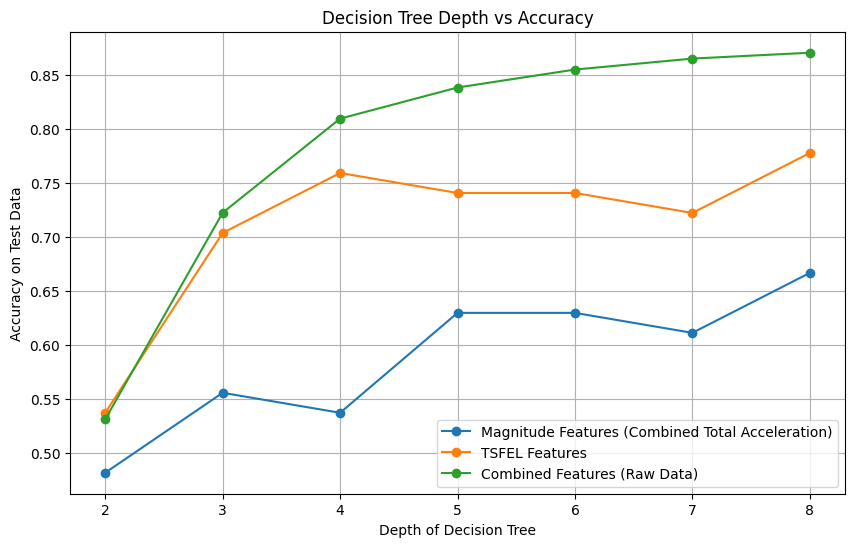

In [105]:
# Function to train and evaluate Decision Tree with varying depths
def evaluate_tree_depths(train_x, test_x, y_train, y_test):
    depths = range(2, 9)  # Depths from 2 to 8
    accuracies = []

    for depth in depths:
        model = DecisionTreeClassifier(max_depth=depth)
        model.fit(train_x, y_train)
        y_pred = model.predict(test_x)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    return depths, accuracies

# Train and evaluate for original magnitude data
depths_magnitude, accuracies_magnitude = evaluate_tree_depths(X_train, X_test, y_train, y_test)

# Train and evaluate for TSFEL-extracted features
depths_tsfel, accuracies_tsfel = evaluate_tree_depths(combined_train_x, combined_test_x, y_train, y_test)

# Train and evaluate for combined features
depths_combined, accuracies_combined = evaluate_tree_depths(X_train_features, X_test_features, y_train_features, y_test_features)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths_magnitude, accuracies_magnitude, label='Magnitude Features (Combined Total Acceleration)', marker='o')
plt.plot(depths_tsfel, accuracies_tsfel, label='TSFEL Features', marker='o')
plt.plot(depths_combined, accuracies_combined, label='Combined Features (Raw Data)', marker='o')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy on Test Data')
plt.title('Decision Tree Depth vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### Magnitude Features Model:
- **WALKING (1):** Precision and recall are low, with misclassification happening into other walking-related activities.
- **WALKING_UPSTAIRS (2):** Similarly, low precision and recall, with misclassification into other walking-related activities.
- **WALKING_DOWNSTAIRS (3):** Precision is moderate, but there are still significant misclassifications.
- **SITTING (4):** Moderate accuracy, but confusion with LAYING (6).
- **STANDING (5):** Perfect precision and recall.
- **LAYING (6):** High precision and recall, no misclassifications.

### TSFEL Features Model:
- **WALKING (1):** Good precision, some misclassification with WALKING_UPSTAIRS (2).
- **WALKING_UPSTAIRS (2):** Precision is lower, with misclassification into WALKING (1) and WALKING_DOWNSTAIRS (3).
- **WALKING_DOWNSTAIRS (3):** High precision, minor misclassification.
- **SITTING (4):** Decent precision, but still some confusion with LAYING (6).
- **STANDING (5):** High precision and recall, but some misclassification with SITTING (4).
- **LAYING (6):** Good precision, some misclassification with SITTING (4).

### Combined Features Model:
- **WALKING (1), WALKING_UPSTAIRS (2), WALKING_DOWNSTAIRS (3):** All have relatively high precision and recall, with minor misclassifications.
- **SITTING (4) and STANDING (5):** The model struggles slightly, with confusion between these two activities, but still performs well overall.
- **LAYING (6):** Perfect precision and recall.

### Conclusion:
- **Magnitude Features Model:** Generally performs poorly, especially for dynamic activities like WALKING, WALKING_UPSTAIRS, and WALKING_DOWNSTAIRS. This is likely because magnitude features alone might not capture the complex variations in acceleration patterns between different activities.
- **TSFEL Features Model:** Performs better, but still struggles with distinguishing between similar activities like WALKING, WALKING_UPSTAIRS, and WALKING_DOWNSTAIRS. This suggests that while TSFEL-extracted features are more informative, there is still some overlap in the feature space for these activities.
- **Combined Features Model:** Performs the best across all activities, especially for dynamic ones, indicating that combining raw data with TSFEL features provides the model with a richer feature space, leading to better discrimination between activities.

**Participants/Activities with Bad Performance:**
- **Activities:** WALKING (1), WALKING_UPSTAIRS (2), WALKING_DOWNSTAIRS (3) show lower performance in the Magnitude Features Model and some confusion in the TSFEL Features Model.
- **Reason:** These activities have similar movement patterns, making it difficult for simpler features or models to differentiate between them effectively. The combined model addresses this issue better by utilizing more comprehensive features.